In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from util.load import DataLoader
from util.backtest import Backtest
from util.plot import (
    create_pairwise_scatter_plot,
    create_correlation_matrix,
    plot_backtest_results,
)

In [2]:
dataloader = DataLoader(data_dir="../data")
ticker = "kxhighny"
max_days = 100
df = dataloader.load_consolidated_daily_data(
    ticker, max_days=max_days, type_="polysignal"
)
df.drop(columns=["time", "ticker", "trade_id"]).head()

Loading kxhighny for 2025-03-25: 100%|██████████| 38/38 [00:00<00:00, 178.09it/s]


time_to_strike  day_forecast_strike_dev  current_forecast_strike_dev  \
0       86378.686                      1.3                        -12.1   
1       86378.686                      1.3                        -12.1   
2       86378.686                      1.3                        -12.1   
3       86378.686                      1.3                        -12.1   
4       86378.686                      1.3                        -12.1   

   day_current_forecast_dev  day_wind_gusts_max  day_wind_speed_max  \
0                      13.4                51.8                27.5   
1                      13.4                51.8                27.5   
2                      13.4                51.8                27.5   
3                      13.4                51.8                27.5   
4                      13.4                51.8                27.5   

   day_cloud_cover_max  day_cloud_cover_min  day_sunshine_duration  \
0                   99                    0               41428.27   
1                   99                    0               41428.27   
2                   99                    0               41428.27   
3                   99                    0               41428.27   
4                   99                    0               41428.27   

   hour_wind_gusts  ...  yes_price_sentiment_60  count_sentiment_60  \
0             18.4  ...                  43.333             100.733   
1             18.4  ...                  43.333             100.733   
2             18.4  ...                  43.333             100.733   
3             18.4  ...                  43.333             100.733   
4             18.4  ...                  43.333             100.733   

   yes_price_trend_60  count_agg_120  yes_price_vol_120  count_vol_120  \
0                  -4           1511              2.637         99.877   
1                  -4           1511              2.637         99.877   
2                  -4           1511              2.637         99.877   
3                  -4           1511              2.637         99.877   
4                  -4           1511              2.637         99.877   

   taker_side_sentiment_120  yes_price_sentiment_120  count_sentiment_120  \
0                       1.0                   43.333              100.733   
1                       1.0                   43.333              100.733   
2                       1.0                   43.333              100.733   
3                       1.0                   43.333              100.733   
4                       1.0                   43.333              100.733   

   yes_price_trend_120  
0                   -4  
1                   -4  
2                   -4  
3                   -4  
4                   -4  

[5 rows x 64 columns]

In [3]:
df.describe()

time  time_to_strike  day_forecast_strike_dev  \
count                          44362    44362.000000             44362.000000   
mean   2025-04-14 13:29:16.017672192    47849.245392                 0.023696   
min       2025-03-24 23:59:21.313972        7.319000               -13.100000   
25%    2025-04-02 10:12:01.223822848    36387.367000                -1.500000   
50%    2025-04-15 10:09:39.633897984    45038.409000                 0.100000   
75%    2025-04-25 13:36:37.170543104    54679.132000                 1.700000   
max       2025-05-03 17:51:29.245700    86399.922000                 9.000000   
std                              NaN    17059.806910                 2.497974   

       current_forecast_strike_dev  day_current_forecast_dev  \
count                 44362.000000              44362.000000   
mean                     -8.013022                  8.036718   
min                     -34.400000                 -0.900000   
25%                     -12.800000                  1.900000   
50%                      -6.000000                  5.700000   
75%                      -2.200000                 13.300000   
max                       6.400000                 32.200000   
std                       7.355253                  7.412911   

       day_wind_gusts_max  day_wind_speed_max  day_cloud_cover_max  \
count        44362.000000        44362.000000         44362.000000   
mean            43.896801           23.334832            91.835467   
min             22.300000           15.900000             0.000000   
25%             37.400000           18.700000           100.000000   
50%             43.900000           22.000000           100.000000   
75%             49.700000           27.500000           100.000000   
max             62.600000           36.000000           100.000000   
std              9.709945            5.314254            25.413028   

       day_cloud_cover_min  day_sunshine_duration  ...  \
count         44362.000000           44362.000000  ...   
mean              9.378116           30405.423035  ...   
min               0.000000               0.000000  ...   
25%               0.000000           21861.640000  ...   
50%               0.000000           34453.170000  ...   
75%               2.000000           43139.030000  ...   
max             100.000000           45756.000000  ...   
std              23.232629           14419.067320  ...   

       yes_price_sentiment_60  count_sentiment_60  yes_price_trend_60  \
count            44362.000000        44362.000000        44362.000000   
mean                35.527980           33.091379           -2.209954   
min                  3.000000            1.000000          -93.000000   
25%                 18.643000           15.148000           -8.000000   
50%                 32.462000           25.741500           -1.000000   
75%                 49.500000           42.078000            4.000000   
max                 97.000000          900.000000           85.000000   
std                 21.459055           30.292997           16.518859   

       count_agg_120  yes_price_vol_120  count_vol_120  \
count   44362.000000       44362.000000   44362.000000   
mean     7373.110365           6.642252      55.516139   
min         1.000000           0.000000       0.000000   
25%      3286.500000           2.444000      25.507000   
50%      5729.000000           4.842000      44.296000   
75%      9537.000000           8.840000      68.702000   
max     37019.000000          30.263000     716.283000   
std      6164.760367           5.785465      47.602418   

       taker_side_sentiment_120  yes_price_sentiment_120  count_sentiment_120  \
count              44362.000000             44362.000000         44362.000000   
mean                   0.561975                35.027420            32.015266   
min                    0.000000                 3.000000             1.000000   
25%                    0.438000                19.452000          

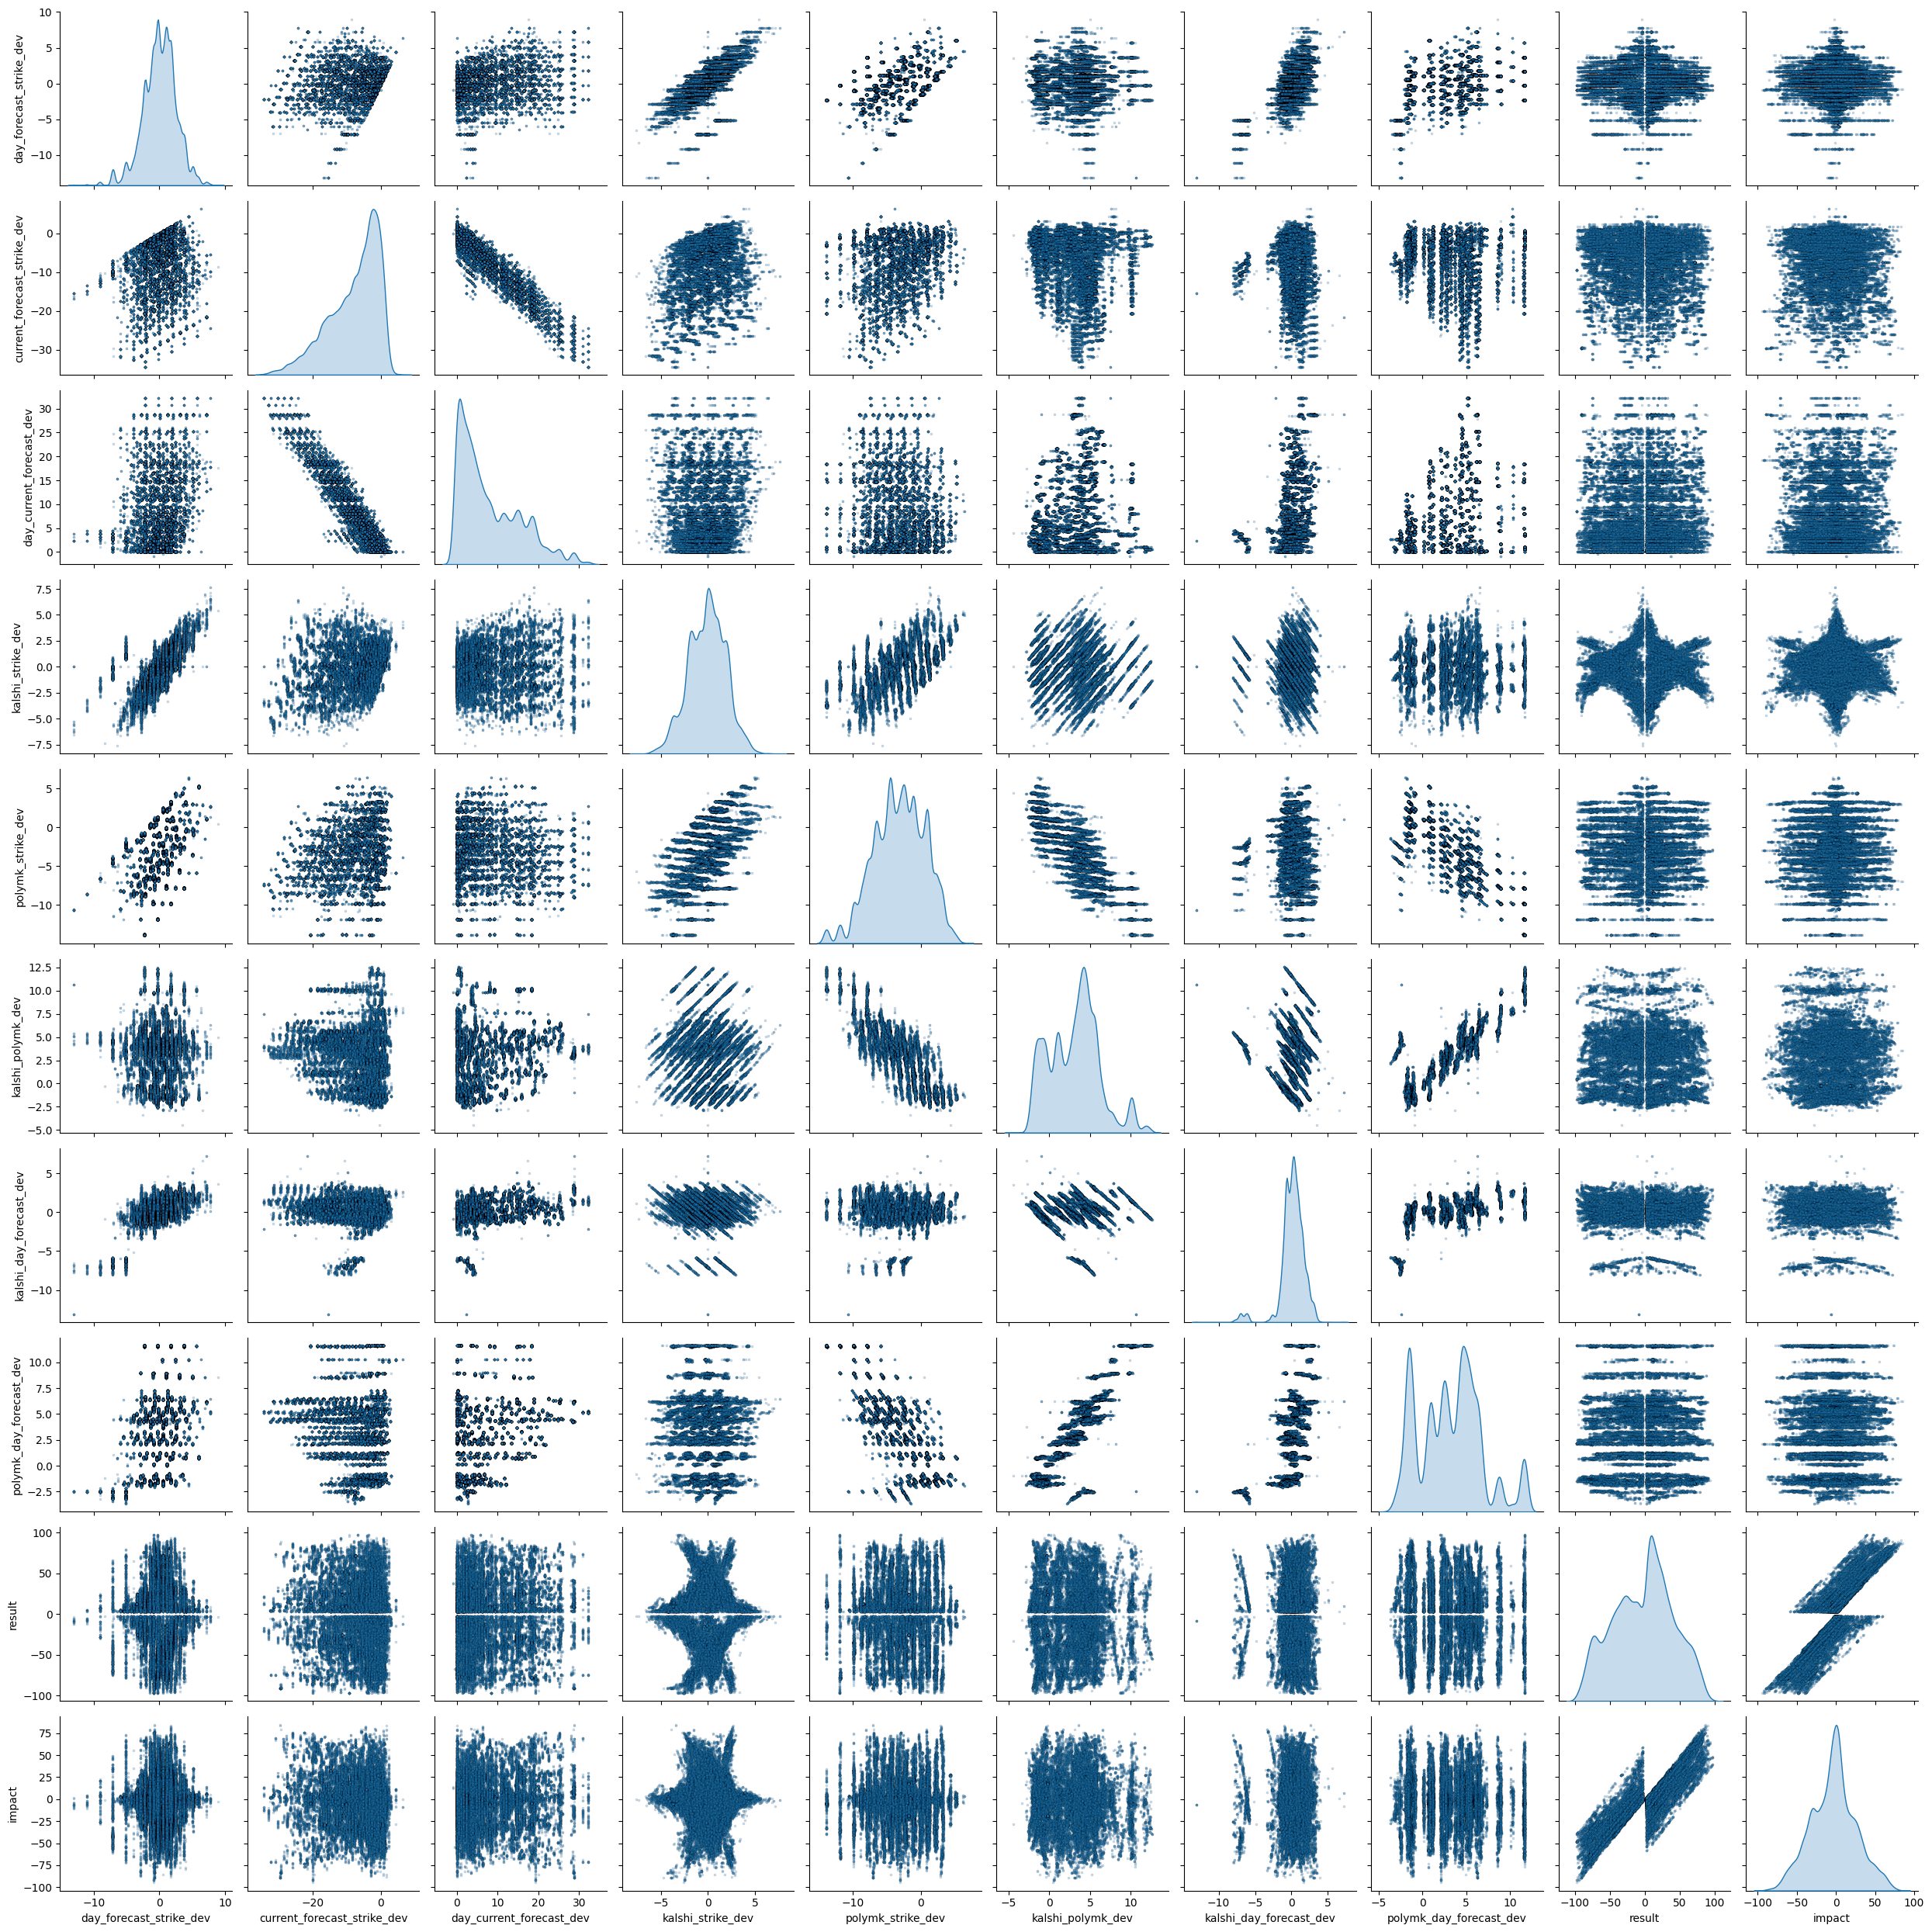

In [4]:
dev_features = [f for f in df.columns if f.endswith("dev")]
create_pairwise_scatter_plot(df, dev_features + ["result", "impact"])

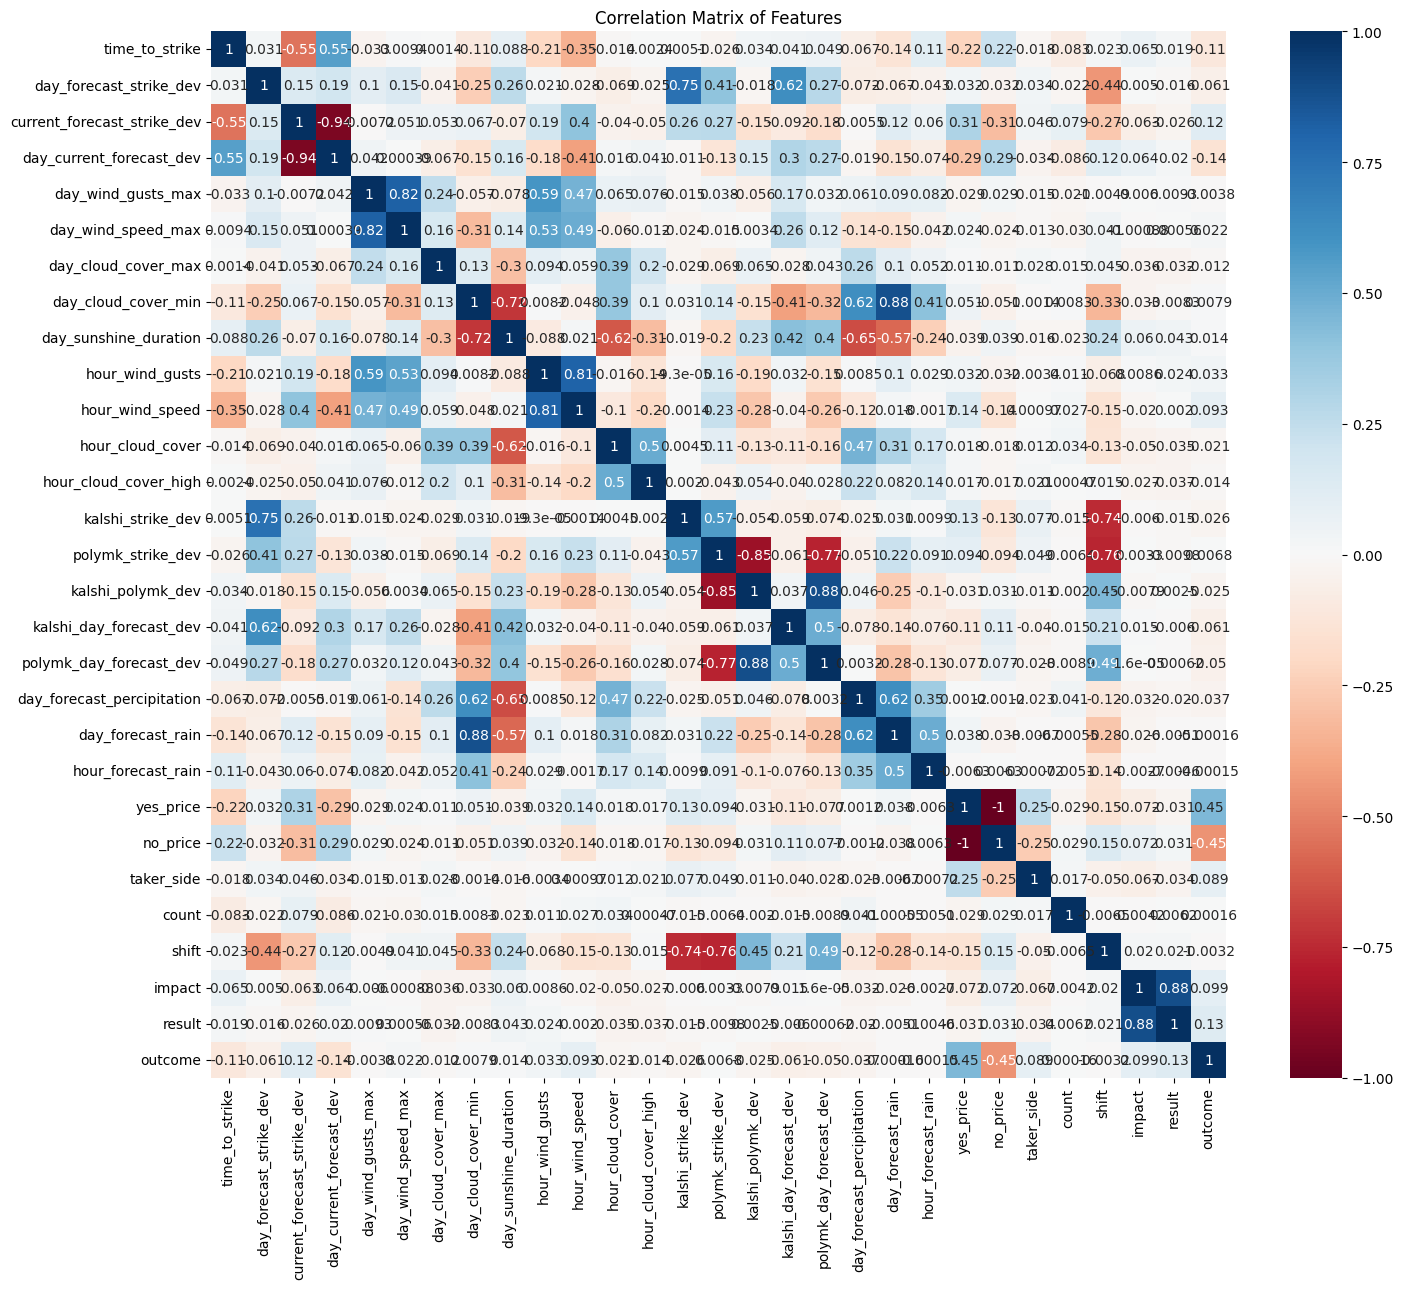

In [5]:
market_features = [
    f
    for f in df.columns.tolist()
    if not f.split("_")[-1].isdigit() and f not in ["time", "ticker", "trade_id"]
]
create_correlation_matrix(df, market_features)

2025-04-24 | R2 train: 0.017600088042041495, R2 test: -0.06512218928789126 | Corr train: 0.1326653235940832, Corr test: -0.10552780323526857
2025-04-25 | R2 train: 0.017085954526221858, R2 test: -0.027547687021306277 | Corr train: 0.1307132531878533, Corr test: 0.06754845217590963
2025-04-26 | R2 train: 0.016462138199372256, R2 test: -0.036956919132609345 | Corr train: 0.12830486441910413, Corr test: 0.028565632662033307
2025-04-27 | R2 train: 0.01865366875509933, R2 test: 0.02799256816430684 | Corr train: 0.13657843452398152, Corr test: 0.19473238064909204
2025-04-28 | R2 train: 0.019591406294312552, R2 test: -0.038898201514842246 | Corr train: 0.13996930493555923, Corr test: -0.06310690481916574
2025-04-29 | R2 train: 0.01910320043789404, R2 test: -0.04528690383043643 | Corr train: 0.13821432800435487, Corr test: -0.015941591553234172
2025-04-30 | R2 train: 0.01723684424232308, R2 test: -0.1592387693076911 | Corr train: 0.13128916280111358, Corr test: -0.14018400755634808
2025-05-01 

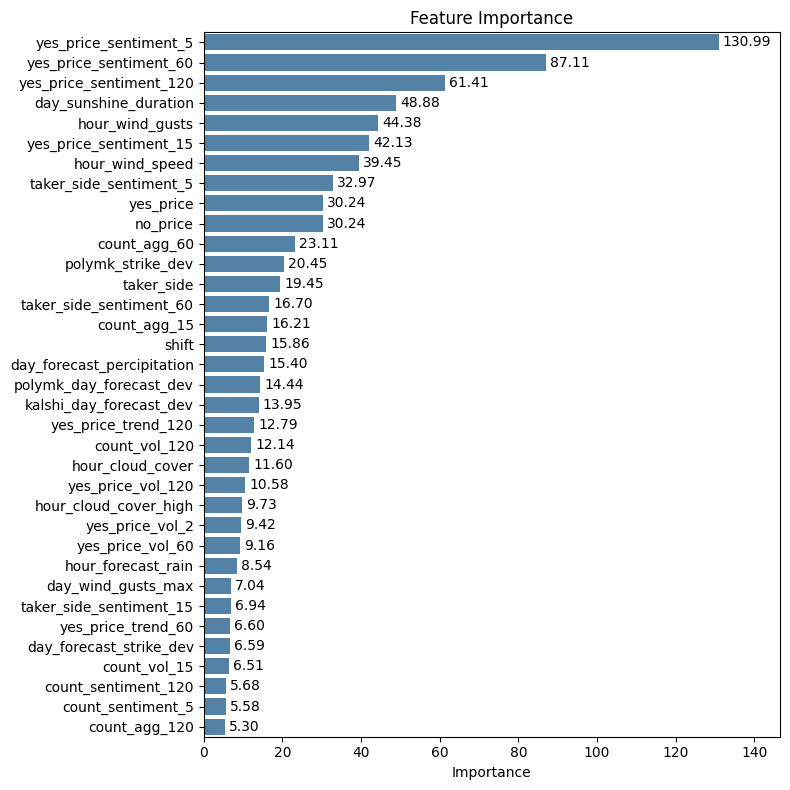

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    QuantileRegressor,
    BayesianRidge,
    Ridge,
)
from sklearn.model_selection import TimeSeriesSplit

# turn time into datetime object


def plot_feature_importances(df, threshold=1):
    df["time"] = pd.to_datetime(df["time"])
    df["date"] = df["time"].dt.date
    exclude = np.array(
        ["time", "result", "impact", "ticker", "trade_id", "outcome", "date"]
    )
    features = np.array([f for f in df.columns.tolist() if f not in exclude])
    tscv = TimeSeriesSplit(n_splits=10, test_size=1)
    feature_importances = np.zeros(len(features))

    for train_index, test_index in tscv.split(df["date"].unique()):
        train_dates, test_dates = (
            df["date"].unique()[train_index],
            df["date"].unique()[test_index],
        )
        train_data, test_data = (
            df[df["date"].isin(train_dates)],
            df[df["date"].isin(test_dates)],
        )

        # scaler = RobustScaler(unit_variance=True)
        scaler = RobustScaler(unit_variance=True)
        train_data[features] = scaler.fit_transform(train_data[features])
        test_data[features] = scaler.transform(test_data[features])
        lasso = Ridge(alpha=0.1)
        lasso.fit(train_data[features], train_data["result"])
        # rf = RandomForestRegressor(n_estimators=100, random_state=42)
        # rf.fit(train_data[features], train_data["result"])
        r2_train = lasso.score(train_data[features], train_data["result"])
        r2_test = lasso.score(test_data[features], test_data["result"])
        corr_train = np.corrcoef(
            lasso.predict(train_data[features]), train_data["result"]
        )[0, 1]
        corr_test = np.corrcoef(
            lasso.predict(test_data[features]), test_data["result"]
        )[0, 1]
        print(
            f"{test_dates[0]} | R2 train: {r2_train}, R2 test: {r2_test} | Corr train: {corr_train}, Corr test: {corr_test}"
        )
        feature_importances += lasso.coef_

    feature_importances = abs(feature_importances)
    sorted_idx = np.argsort(feature_importances)[::-1]
    features, feature_importances = (
        features[sorted_idx],
        feature_importances[sorted_idx],
    )
    features = features[feature_importances > threshold]
    feature_importances_df = pd.DataFrame(
        {
            "Feature": features,
            "Importance": feature_importances[feature_importances > threshold],
        }
    )

    plt.figure(figsize=(8, 8))
    ax = sns.barplot(
        y="Feature", x="Importance", data=feature_importances_df, color="steelblue"
    )
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("")
    for i, bar in enumerate(ax.patches):
        width = bar.get_width()
        ax.text(
            width + 1,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.2f}",
            ha="left",
            va="center",
        )
    current_xlim = plt.xlim()
    plt.xlim(current_xlim[0], current_xlim[1] + 9)
    plt.tight_layout()
    plt.show()


plot_feature_importances(df, threshold=5)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    QuantileRegressor,
    BayesianRidge,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


class Model(object):

    def __init__(
        self,
        output_metric: str = "result",
        features: list[str] = None,
        outlier_threshold: float = 0.00,
    ):
        self.output_metric = output_metric
        self.features = features
        self.outlier_threshold = outlier_threshold
        self.pipeline = Pipeline(
            [
                ("robust_scaler", RobustScaler(unit_variance=True)),
                (
                    "quantile_transformer",
                    QuantileTransformer(n_quantiles=100, output_distribution="normal"),
                ),
                (
                    "voting",
                    VotingRegressor(
                        estimators=[
                            (
                                "gb",
                                GradientBoostingRegressor(
                                    n_estimators=50,
                                    learning_rate=0.01,
                                    max_depth=4,
                                    subsample=0.5,
                                    min_samples_split=50,
                                    random_state=42,
                                ),
                            ),
                            (
                                "rf",
                                RandomForestRegressor(
                                    n_estimators=50, max_depth=3, random_state=42
                                ),
                            ),
                            ("lasso", Lasso(alpha=0.1)),
                            ("knn_10", KNeighborsRegressor(n_neighbors=25)),
                        ],
                        n_jobs=-1,
                    ),
                ),
            ]
        )

    def __call__(
        self, train_data: pd.DataFrame, input_data: pd.DataFrame
    ) -> pd.DataFrame:
        if self.features is None:
            self.features = [
                f
                for f in train_data.columns.tolist()
                if (
                    f
                    not in ["time", "result", "impact", "ticker", "trade_id", "outcome"]
                )
            ]
            # print(self.features)
        self.pipeline.fit(train_data[self.features], train_data[self.output_metric])
        input_predictions = self.pipeline.predict(input_data[self.features])
        train_predictions = self.pipeline.predict(train_data[self.features])
        return train_predictions, input_predictions

100%|██████████| 38/38 [02:45<00:00,  4.35s/it]


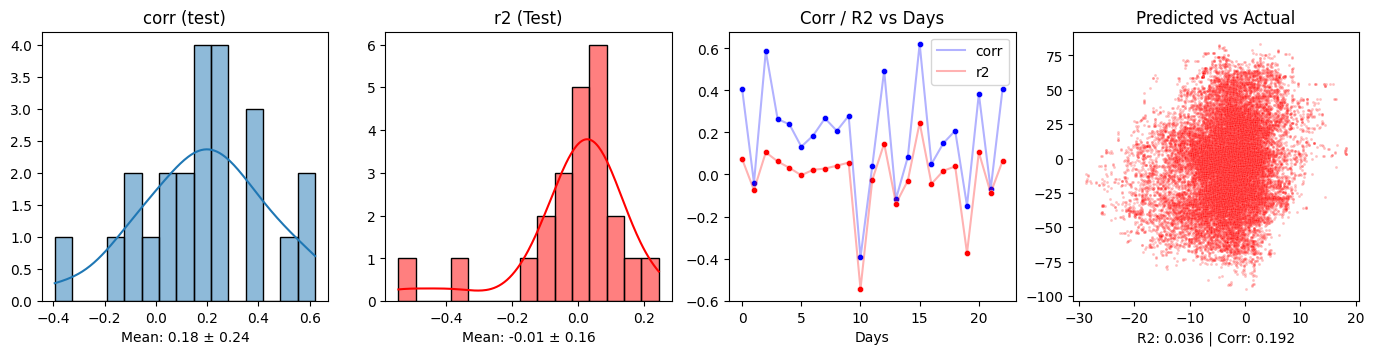

In [8]:
min_window_size, max_window_size, backtest_window = 15, 30, 50

output_metric = "impact"
backtest = Backtest("kxhighny", data_dir="../data", backtest_window=backtest_window)
model = Model(features=None, output_metric=output_metric)

results, predictions, day_predictions, predictions_df = backtest.get_backtest_stats(
    model,
    min_window_size,
    max_window_size,
    output_metric=output_metric,
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="uniform")
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="normal")
)
plot_backtest_results(results, predictions)

In [9]:
results[results["corr_test"] > -0.1].mean()

r2_train      0.307983
r2_test       0.038717
corr_train    0.740541
corr_test     0.244574
dtype: float64

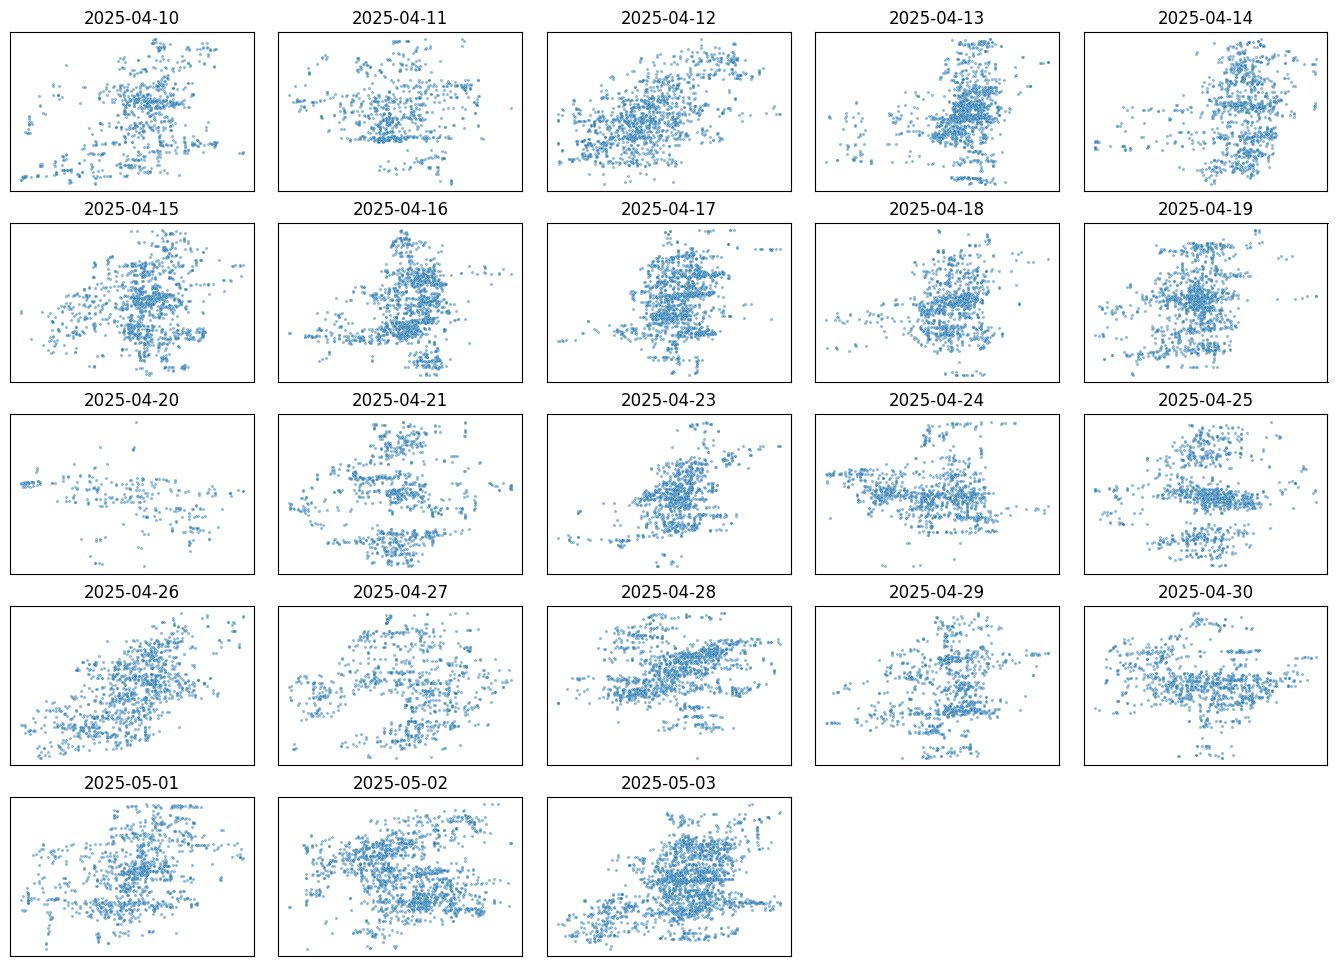

In [14]:
dates = sorted(list(day_predictions.keys()))
fig, axs = plt.subplots(len(dates) // 5 + 1, 5, figsize=(17, 12))

# Add padding between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

for i in range(0, len(dates), 5):
    for idx, date in enumerate(dates[i : i + 5]):
        if i // 5 < axs.shape[0] and idx < axs.shape[1]:  # Check if the subplot exists
            # axs[i//5, idx].scatter(day_predictions[date]["y_pred"], day_predictions[date]["y_real"], alpha=0.5, s=2)
            sns.scatterplot(
                x="y_pred",
                y="y_real",
                data=day_predictions[date],
                ax=axs[i // 5, idx],
                alpha=0.5,
                s=5,
            )
            axs[i // 5, idx].set_title(date)
            axs[i // 5, idx].xaxis.set_visible(False)
            axs[i // 5, idx].yaxis.set_visible(False)

# Hide empty subplots in the last row
for i in range(len(dates), (len(dates) // 5 + 1) * 5):
    row = i // 5
    col = i % 5
    if row < axs.shape[0] and col < axs.shape[1]:
        axs[row, col].set_visible(False)
plt.show()

In [11]:
np.mean(predictions_df[predictions_df["taker_side"] == 1]["result"])
np.mean(predictions_df[predictions_df["taker_side"] == 0]["result"])

np.float64(-1.1057639809687232)

In [12]:
create_correlation_matrix(predictions_df, market_features + ["result", "result_pred"])

KeyError: "['result_pred'] not in index"